In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [46]:
clean = pd.read_csv(str(Path("../data/interim/clean.csv")), parse_dates=True, infer_datetime_format=True,
                    index_col=0, low_memory=False)
predict = pd.read_csv(str(Path("../models/predictions.csv")), parse_dates=True, infer_datetime_format=True,
                      index_col=0, header=None, names=['Wind Spd (km/h)'])
training_history = pd.read_csv(str(Path("../models/training_history.csv")), index_col=0)
learning_history = pd.read_csv(str(Path("../models/final_history.csv")), index_col=0)

In [47]:
train_end = '2017-12'
val_start = '2018-01'
val_end = '2018-06'
test_start = '2018-07'
    
train = clean.loc[:train_end]
validate = clean.loc[val_start:val_end]
test = clean.loc[test_start:]
    
train_y = train.pop('Wind Spd (km/h)')
validate_y = validate.pop('Wind Spd (km/h)')
test_y = test.pop('Wind Spd (km/h)')   
    
persist_y = pd.Series(test_y.shift(1), index=test.index)
predict_y = predict['Wind Spd (km/h)']

predict_se = (test_y - predict_y)**2
persist_se = (test_y - persist_y)**2

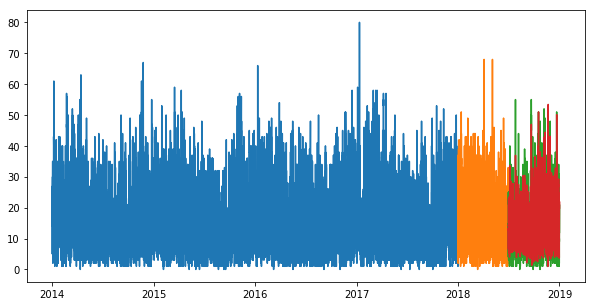

In [48]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(train_y)   
ax.plot(validate_y)
ax.plot(test_y)
ax.plot(predict_y)
plt.show()

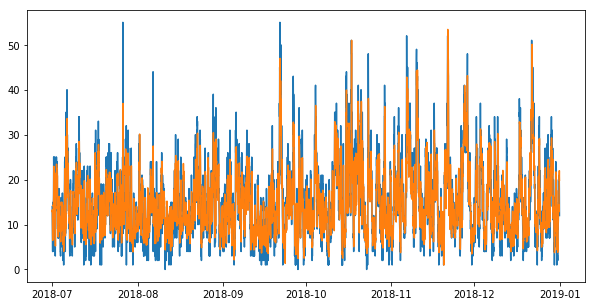

In [49]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(test_y)
ax.plot(predict_y)
plt.show()

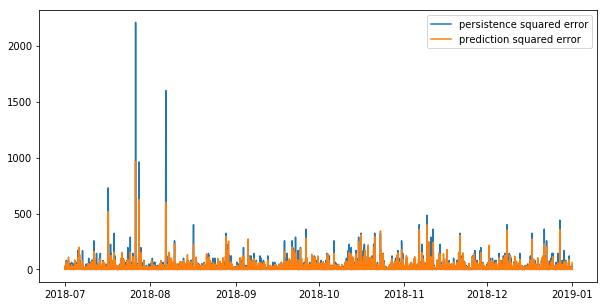

In [50]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(persist_se, label='persistence squared error')
ax.plot(predict_se, label='prediction squared error')
plt.legend()
plt.show()

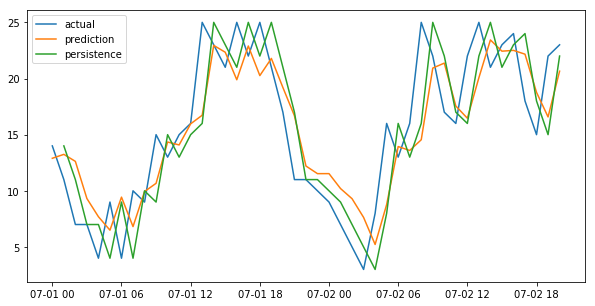

In [51]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(test_y[:45], label='actual')
ax.plot(predict_y[:45], label='prediction')
ax.plot(persist_y[:45], label='persistence')
plt.legend()
plt.show()

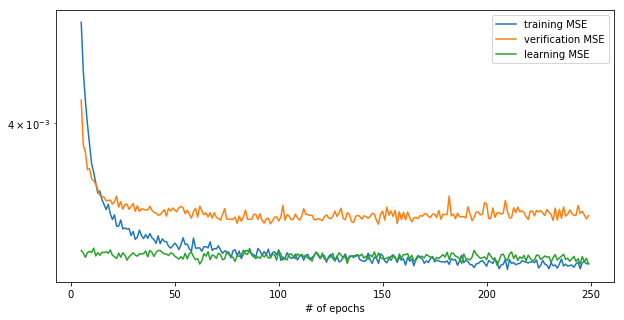

In [52]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.semilogy(training_history['loss'].iloc[5:], label='training MSE')
ax.semilogy(training_history['val_loss'].iloc[5:], label='verification MSE')
ax.semilogy(learning_history['loss'].iloc[5:], label='learning MSE')
ax.set_xlabel('# of epochs')
plt.legend()
plt.show()

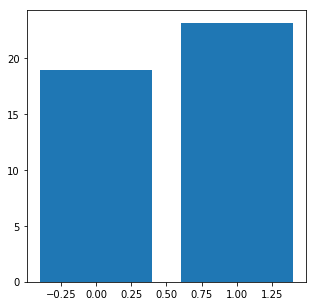

In [53]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.bar([0,1], height=[predict_se.mean(), persist_se.mean()])
plt.show()